<a href="https://colab.research.google.com/github/Reefavibes/AI-Research/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Notebook - Spring 2024

In [ ]:
import matplotlib.pyplot as plt
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [ ]:
def plot(x):
    # Create a figure and a set of subplots.
    fig, ax = plt.subplots()

    # Display data as an image, i.e., on a 2D regular raster, with a grayscale colormap.
    im = ax.imshow(x, cmap='gray')

    # Turn off the axes.
    ax.axis('off')

    # Set the size of the figure in inches.
    fig.set_size_inches(20, 20)

    # Display the figure.
    plt.show()


In [ ]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-4-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


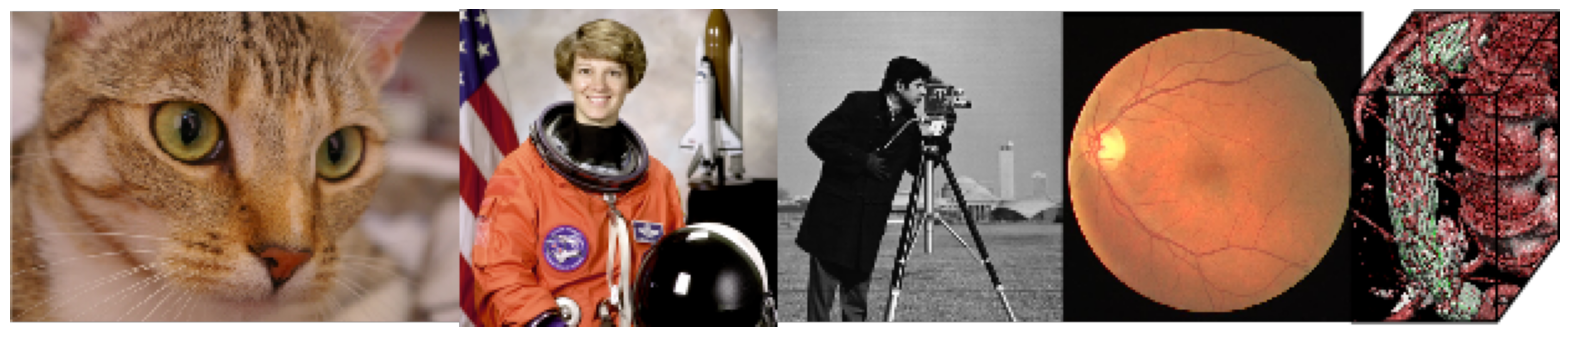

In [ ]:
plot(im)

In [ ]:
net = alexnet(pretrained=True).cuda(0)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

In [ ]:
# Define a normalization transform with the specified mean and standard deviation for each color channel.
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],  # Mean for the red, green, and blue channels
    std=[0.229, 0.224, 0.225]    # Standard deviation for the red, green, and blue channels
)

# Define a preprocessing pipeline that consists of several transforms applied in sequence.
preprocess = transforms.Compose([
    transforms.Resize(256),       # Resize the input image to 256x256 pixels.
    transforms.CenterCrop(224),   # Crop the image at the center to 224x224 pixels.
    transforms.ToTensor(),        # Convert the image to a PyTorch tensor.
    normalize                     # Apply the normalization defined above.
])


In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)

In [ ]:
img_tensor = img_tensor.unsqueeze_(0)

In [ ]:
img_tensor.shape

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)

In [ ]:
out = net(img_variable)

In [ ]:
label_index = out.cpu().data.numpy().argmax()

In [ ]:
label_index

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
print(labels[label_index])

In [ ]:
for i in range(10):
    print(labels[top_list[i]])

In [ ]:
net

In [ ]:
summary(net, (3, 224, 224))

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [ ]:
plot(out[0,0,:,:])

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

In [ ]:
plot(im)

In [ ]:
def load_im(im):
    # Convert the input numpy array 'im' to a PIL Image format for preprocessing.
    image = Image.fromarray(im) #convert to pil

    # Apply the predefined preprocessing transformations to the PIL Image.
    # This typically includes resizing, cropping, converting to tensor, and normalization.
    img_tensor = preprocess(image)

    # Add a new dimension at index 0 to create a batch dimension.
    # Deep learning models expect inputs in batches, even if it's a batch of one.
    img_tensor = img_tensor.unsqueeze_(0)

    # Convert the tensor to a PyTorch tensor and transfer it to the GPU for faster processing.
    # 'cuda(0)' specifies that the tensor should be moved to the first GPU.
    img_variable = torch.tensor(img_tensor).cuda(0)

    # Return the transformed image variable, now ready to be inputted into a model.
    return img_variable


In [ ]:
out = net(load_im(im))

In [ ]:
def inference(im):
    # Process the image through the network to get the output logits or scores
    out = net(load_im(im))

    # Move the output tensor from GPU to CPU and convert to numpy array, then find the index with the highest score
    label_index = out.cpu().data.numpy().argmax()

    # Get the indices of the scores sorted from highest to lowest and select the top 10, then reverse the list
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

    # Print the label corresponding to the highest score
    print(labels[label_index])

    # Print a separator
    print("___")

    # Iterate over the top 10 indices and print their corresponding labels
    for i in range(10):
        print(labels[top_list[i]])


In [ ]:
inference(im)

# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
# This function takes a URL of a Google Slide and processes it to obtain a downloadable PDF URL.
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/" # Base URL for Google Slide presentations
    url_body = url.split('/')[5] # Gets the presentation ID from the URL
    page_id = url.split('.')[-1] # Gets the last part of the URL which might be the page ID
    # Constructs the final URL to access the PDF version of the presentation
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

# This function takes the URL for a Google Slide, obtains the PDF, and converts it to images.
def get_slides(url):
    url = get_google_slide(url) # Get the PDF URL of the Google Slide
    r = requests.get(url, allow_redirects=True) # Sends a GET request to the PDF URL
    # Writes the content of the PDF file to 'file.pdf'
    open('file.pdf', 'wb').write(r.content)
    # Converts the PDF file to images, assuming a function convert_from_path exists
    images = convert_from_path('file.pdf', 500)
    return images

# This function is intended to process an image, applying certain transformations.
def load(image):
    # Applies predefined transformations to the image, prepares it for model input, and moves it to the active device
    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

# Sets the device for PyTorch based on whether CUDA is available, defaulting to the CPU otherwise.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [ ]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
url = "https://docs.google.com/presentation/d/1VkpMTucKA__aAfkASbzquIl79U09qbc4LpMFGSKatyw/edit?pli=1#slide=id.g19b8867b70f_0_176"

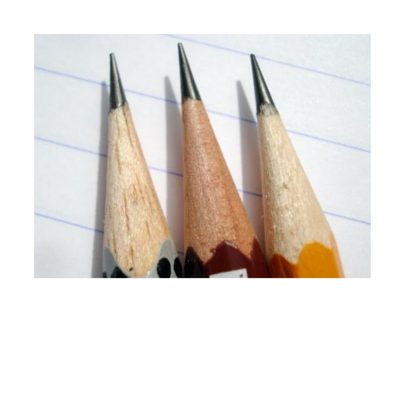

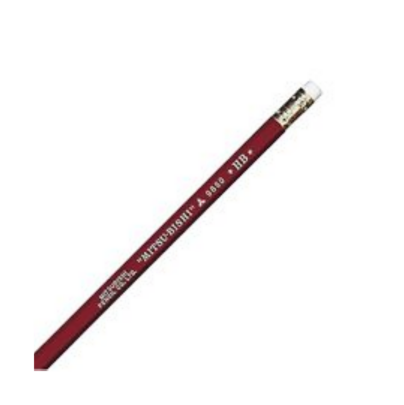

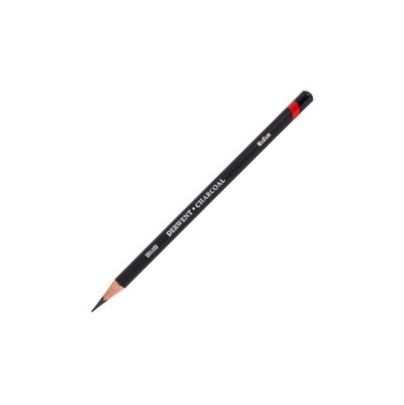

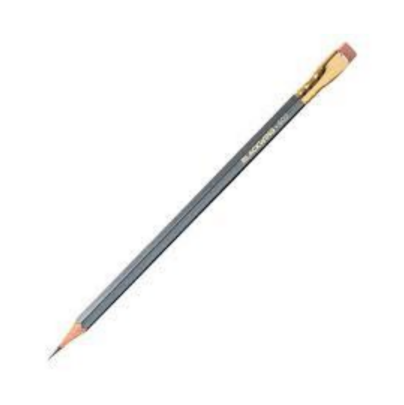

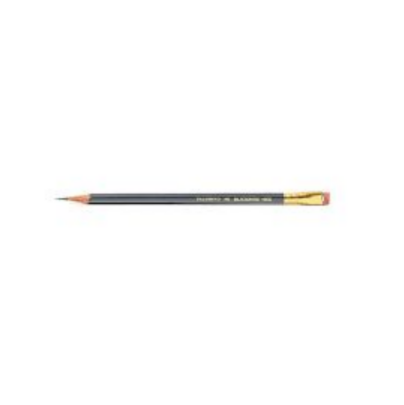

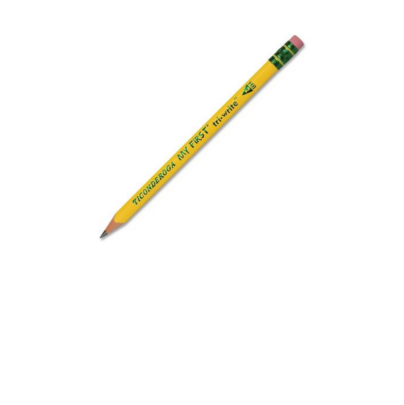

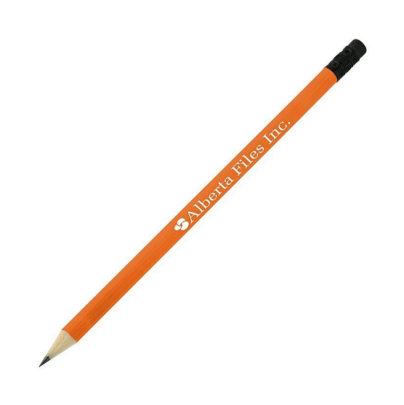

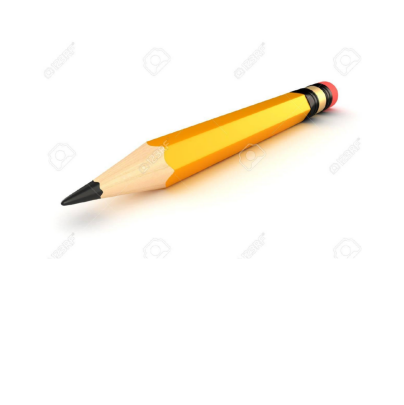

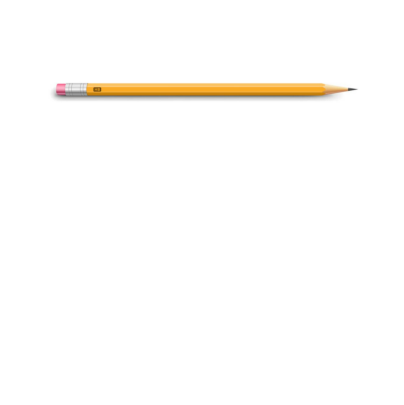

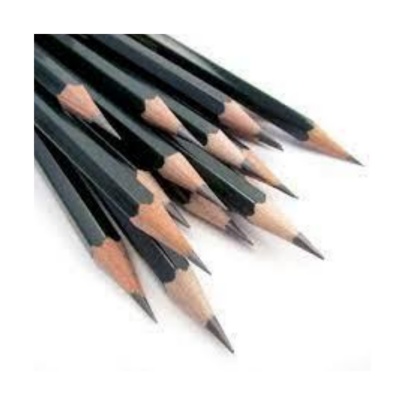

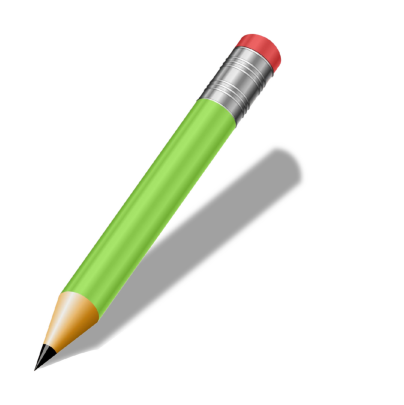

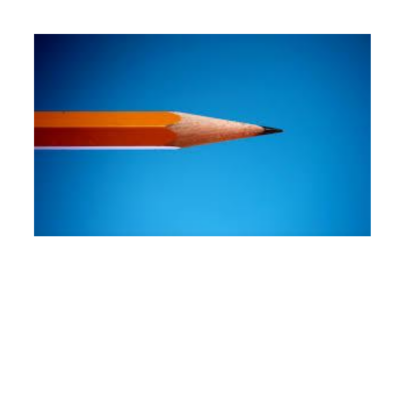

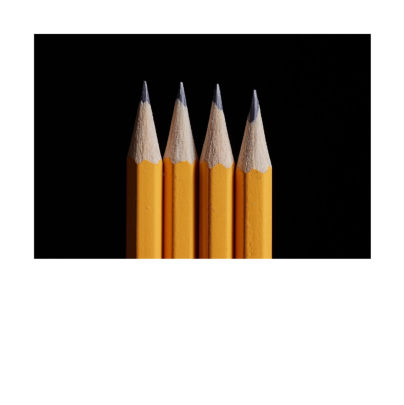

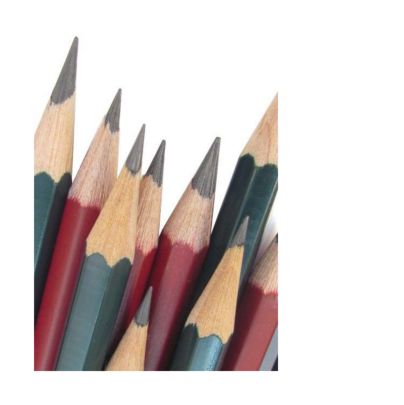

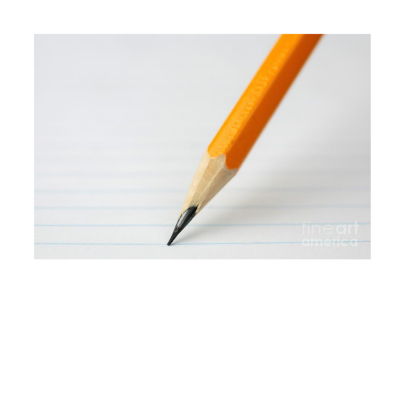

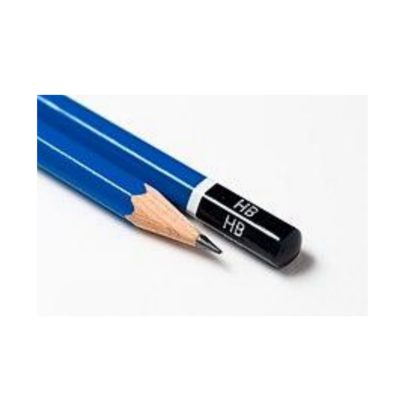

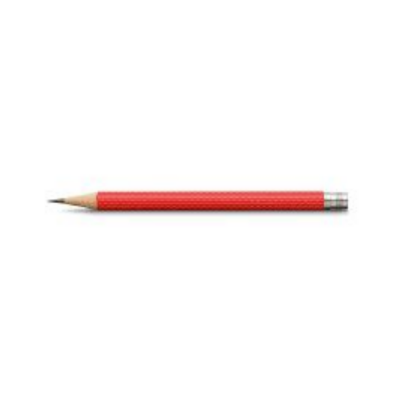

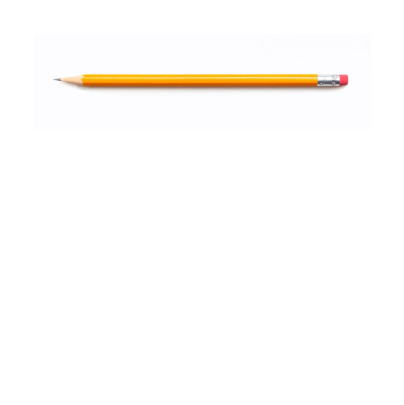

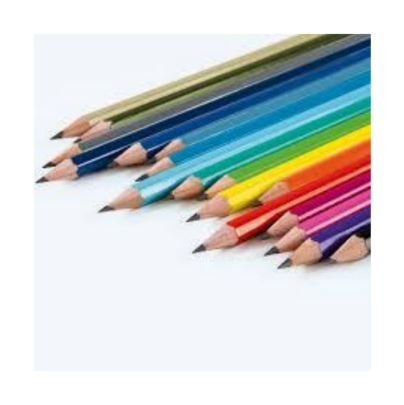

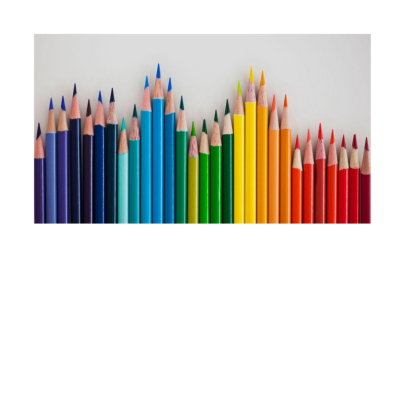

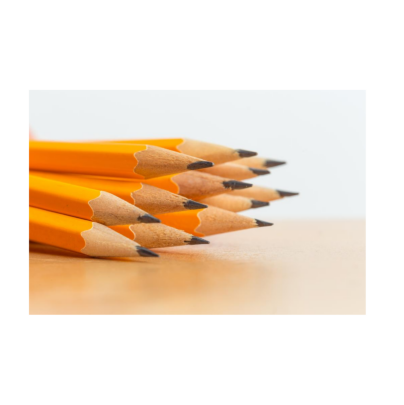

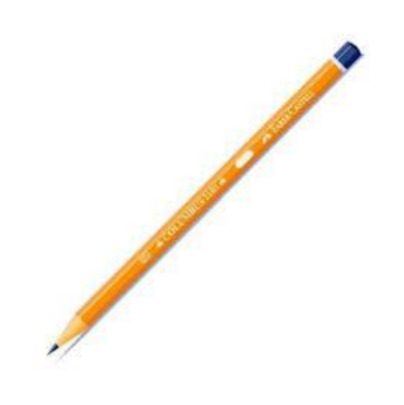

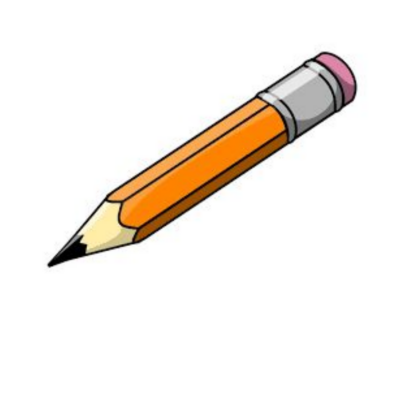

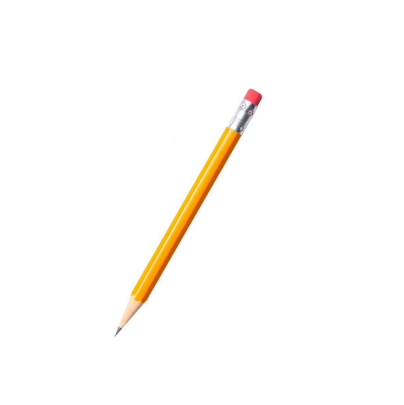

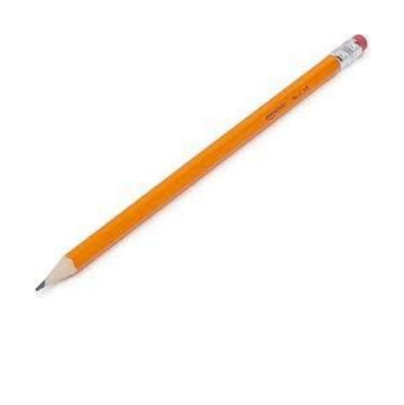

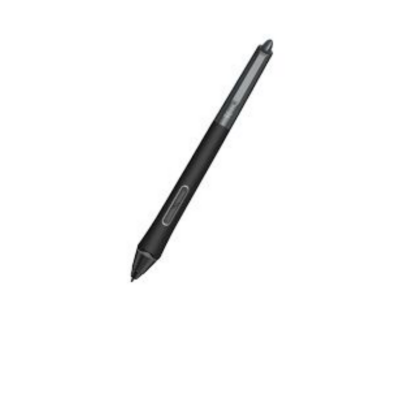

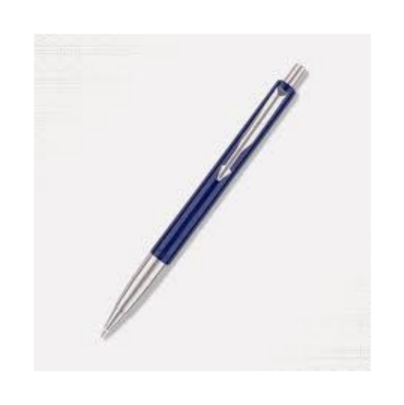

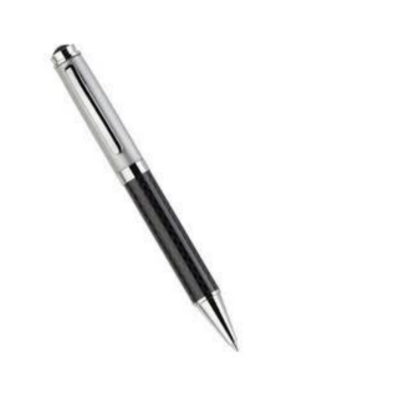

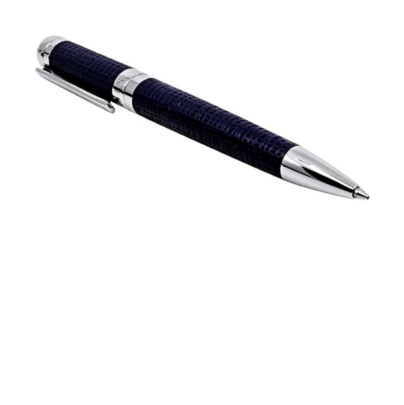

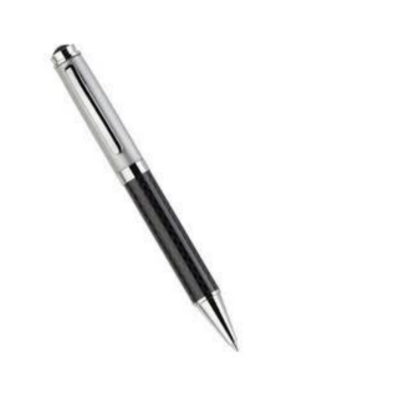

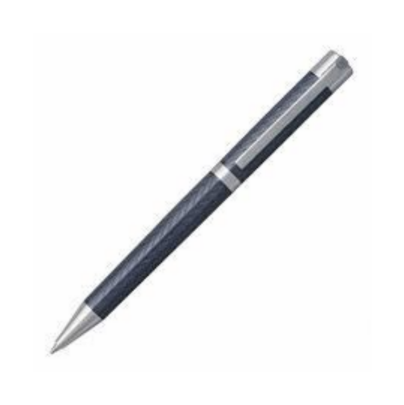

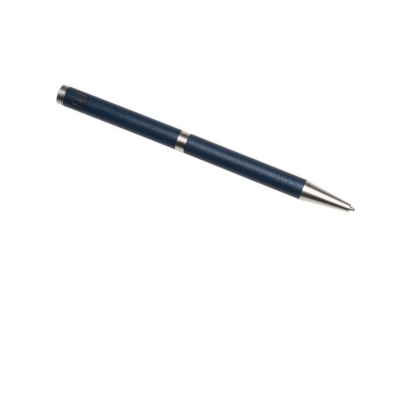

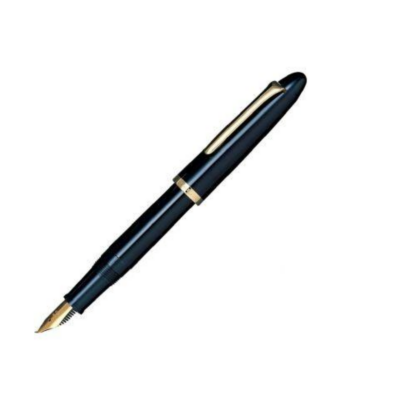

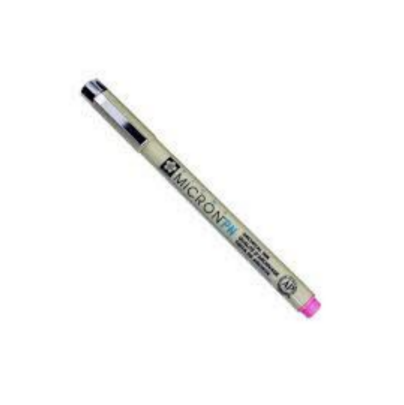

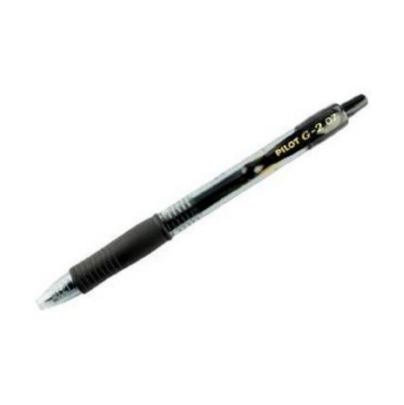

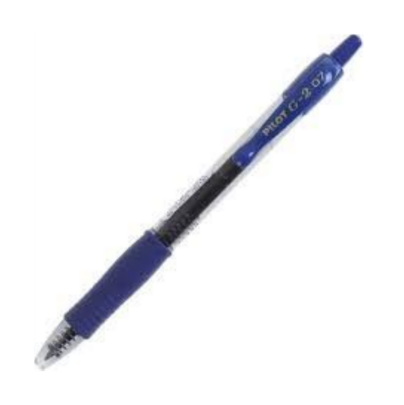

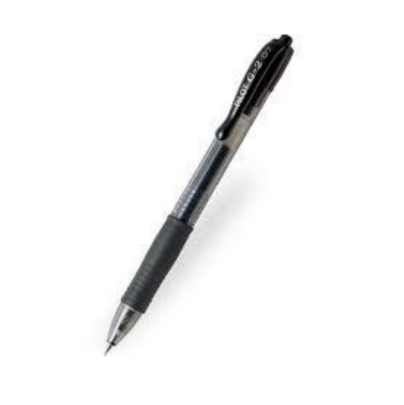

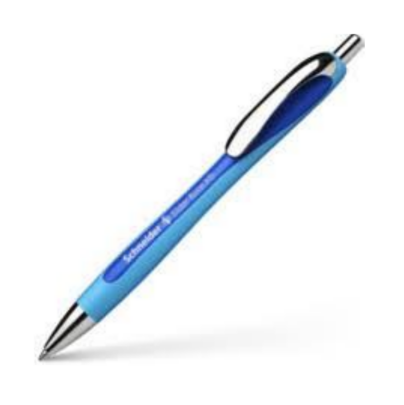

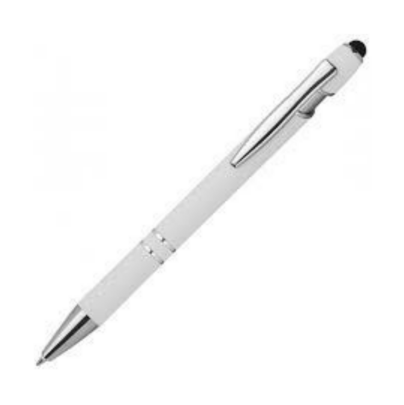

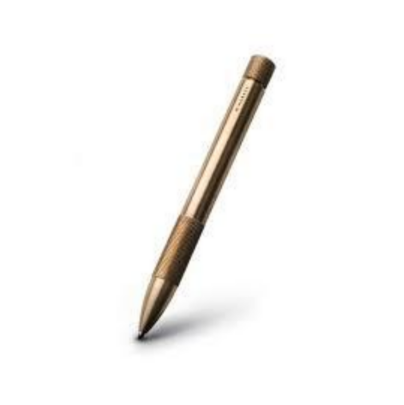

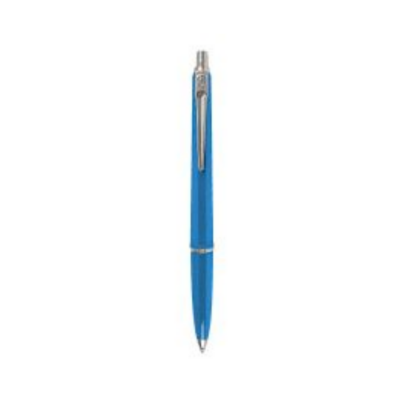

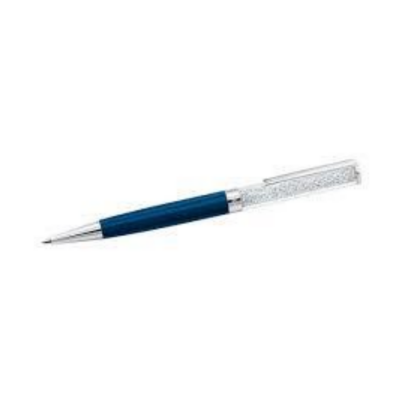

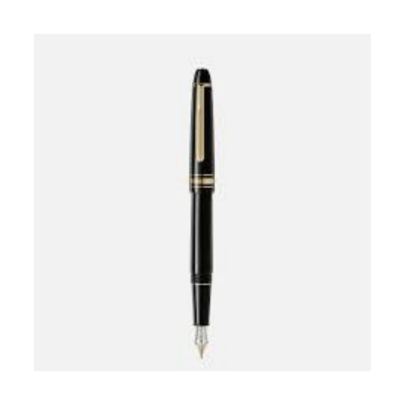

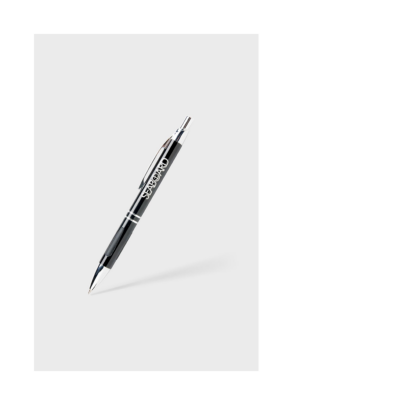

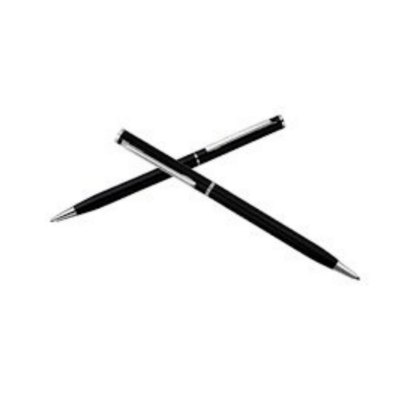

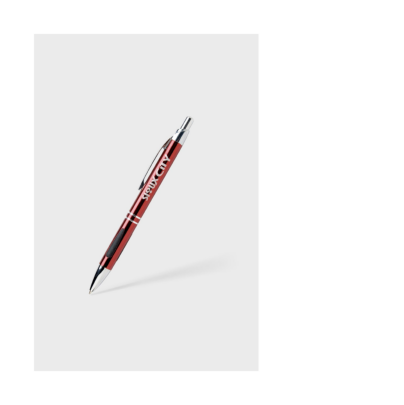

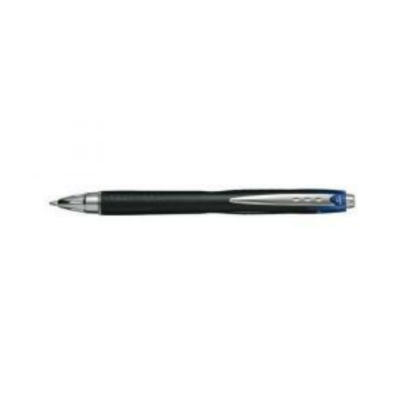

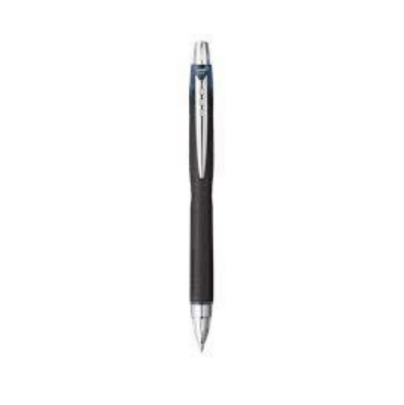

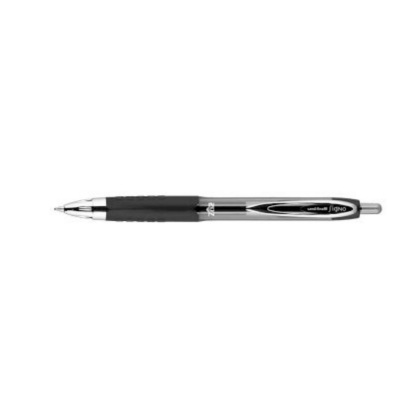

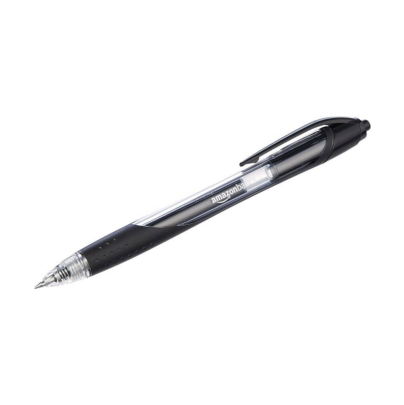

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

In [ ]:
model(images)

In [ ]:
y = model(images)

In [ ]:
y.shape

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

In [ ]:
np.argmax(X[0])

In [ ]:
labels[948]

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

In [ ]:
labels

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
# This function fetches a batch of samples from a dataset.
def get_batch(mode):
    b = c.b # The batch size is likely stored in an object 'c' with attribute 'b'.

    # If the 'mode' is 'train', it will fetch a batch from the training set.
    if mode == "train":
        # Generate a random index in the training data.
        r = np.random.randint(X.shape[0]-b)
        # Fetch a batch of inputs from the training set starting from index 'r'.
        x = X[r:r+b,]
        # Fetch the corresponding targets/labels for the inputs from the training set.
        y = Y[r:r+b]

    # If the 'mode' is 'test', it will fetch a batch from the test set.
    elif mode == "test":
        # Generate a random index in the test data.
        r = np.random.randint(X_test.shape[0]-b)
        # Fetch a batch of inputs from the test set starting from index 'r'.
        x = X_test[r:r+b,]
        # Fetch the corresponding targets/labels for the inputs from the test set.
        y = Y_test[r:r+b]

    # Return the batch of inputs and their corresponding labels.
    return x, y


In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()
